In [1]:
year = 'Summer2018UL'

In [2]:
import os

from utils.analysis.gnn import model_path
if model_path[-1] == '/': model_path = model_path[:-1]
model_dir = model_path.split('/')[-2]

model_savein = f'plots/feynnet/{model_dir}'
if not os.path.exists(model_savein): os.makedirs(model_savein)
model_savein = f'plots/feynnet/{model_dir}/{year}'
if not os.path.exists(model_savein): os.makedirs(model_savein)

if not os.path.exists(model_savein + '/root_files'): os.makedirs(model_savein + '/root_files')

model_dir

'20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg'

In [3]:
from utils.plotter import r_cmap
import subprocess, shlex

In [4]:
base = f'/eos/uscms/store/user/srosenzw/sixb/ntuples/{year}/maxbtag_4b/Official_NMSSM'
cmd = f"ls {base}"
output = subprocess.check_output(shlex.split(cmd))
output = output.decode('UTF-8')
output = output.split('\n')
signal_list = [f"{base}/{out}/ntuple.root" for out in output if out.startswith('NMSSM')]
signal_list = [out for out in signal_list if int(out.split("_")[4].split('-')[1]) < 1300]
# output

In [5]:
def get_mx(signal):
    mx = int(signal.split('/')[-2].split('_')[2].split('-')[1])
    # my = int(signal.split('/')[-2].split('_')[3].split('-')[1])
    return mx

In [6]:
signal_list[0].split('/')[-2].split('_')[3].split('-')[1]

'250'

In [7]:
MX, MY = [], []
sig_eff = {}
X, Y, Z = [], [], []

for out in signal_list:
    if get_mx(out) < 1500:
        try: signal = sixb_from_gnn(out)
        except IndexError: continue

        # break

        MX.append(signal.mx)
        MY.append(signal.my)
        
        X.append(signal.mx)
        Y.append(signal.my)

        if signal.mx not in sig_eff.keys(): sig_eff[signal.mx] = {}
        eff = ak.sum(signal.n_H_correct[signal.resolved_mask]==3)/ak.sum(signal.resolved_mask)
        # eff = ak.sum(signal.n_H_paired_correct[signal.resolved_mask]==3)/ak.sum(signal.resolved_mask)
        sig_eff[signal.mx][signal.my] = eff
        Z.append(eff)

X = np.asarray(X)
Y = np.asarray(Y)
Z = np.asarray(Z)

[13:02:03] Loading model:                                                                             ]8;id=90697;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=29218;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=349647;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=481351;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-250_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1000_MY-250_TuneCP5_13TeV-madgraph-pythia8


[13:02:05] Loading                                                                                    ]8;id=121704;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=71465;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:02:07] Loading model:                                                                             ]8;id=263991;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=207485;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=845024;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=761618;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-300_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1000_MY-300_TuneCP5_13TeV-madgraph-pythia8


[13:02:09] Loading                                                                                    ]8;id=961656;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=512465;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:02:10] Loading model:                                                                             ]8;id=600497;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=894373;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=217199;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=637085;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-350_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1000_MY-350_TuneCP5_13TeV-madgraph-pythia8


[13:02:12] Loading                                                                                    ]8;id=606031;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=363192;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:02:14] Loading model:                                                                             ]8;id=815892;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=818635;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=401191;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=525926;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-400_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1000_MY-400_TuneCP5_13TeV-madgraph-pythia8


[13:02:16] Loading                                                                                    ]8;id=370154;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=708002;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:02:18] Loading model:                                                                             ]8;id=478408;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=540318;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=949501;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=794379;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-450_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1000_MY-450_TuneCP5_13TeV-madgraph-pythia8


[13:02:20] Loading                                                                                    ]8;id=474674;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=573236;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:02:22] Loading model:                                                                             ]8;id=125093;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=328553;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=129419;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=221614;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-500_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1000_MY-500_TuneCP5_13TeV-madgraph-pythia8


[13:02:24] Loading                                                                                    ]8;id=8561;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=881183;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:02:27] Loading model:                                                                             ]8;id=406376;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=745395;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-600_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=877991;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=406300;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-600_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1000_MY-600_TuneCP5_13TeV-madgraph-pythia8


[13:02:32] Loading                                                                                    ]8;id=768697;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=407453;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-600_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:02:37] Loading model:                                                                             ]8;id=488461;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=486184;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-700_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=931665;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=175697;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-700_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1000_MY-700_TuneCP5_13TeV-madgraph-pythia8


[13:02:39] Loading                                                                                    ]8;id=217010;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=246924;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-700_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:02:41] Loading model:                                                                             ]8;id=575440;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=323419;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-800_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=249620;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=511969;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-800_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1000_MY-800_TuneCP5_13TeV-madgraph-pythia8


[13:02:43] Loading                                                                                    ]8;id=646608;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=585224;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1000_MY-800_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:02:45] Loading model:                                                                             ]8;id=907015;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=424599;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=590791;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=82473;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-250_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1100_MY-250_TuneCP5_13TeV-madgraph-pythia8


[13:02:47] Loading                                                                                    ]8;id=650473;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=561346;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:02:49] Loading model:                                                                             ]8;id=615244;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=95130;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=80667;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=377608;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-300_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1100_MY-300_TuneCP5_13TeV-madgraph-pythia8


[13:02:51] Loading                                                                                    ]8;id=316284;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=219021;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:02:52] Loading model:                                                                             ]8;id=531419;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=15277;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=220356;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=252065;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-350_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1100_MY-350_TuneCP5_13TeV-madgraph-pythia8


[13:02:54] Loading                                                                                    ]8;id=454211;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=232937;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:02:56] Loading model:                                                                             ]8;id=913937;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=778611;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=634728;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=503833;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-400_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1100_MY-400_TuneCP5_13TeV-madgraph-pythia8


[13:02:58] Loading                                                                                    ]8;id=133564;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=262932;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:03:00] Loading model:                                                                             ]8;id=731435;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=101936;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=635186;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=974544;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-450_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1100_MY-450_TuneCP5_13TeV-madgraph-pythia8


[13:03:03] Loading                                                                                    ]8;id=94187;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=99381;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:03:05] Loading model:                                                                             ]8;id=486221;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=312073;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=894765;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=822047;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-500_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1100_MY-500_TuneCP5_13TeV-madgraph-pythia8


[13:03:07] Loading                                                                                    ]8;id=667660;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=792073;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:03:09] Loading model:                                                                             ]8;id=695024;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=160276;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-600_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=491546;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=956938;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-600_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1100_MY-600_TuneCP5_13TeV-madgraph-pythia8


[13:03:11] Loading                                                                                    ]8;id=981243;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=815411;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-600_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:03:13] Loading model:                                                                             ]8;id=312812;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=121227;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-700_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=527520;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=298568;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-700_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1100_MY-700_TuneCP5_13TeV-madgraph-pythia8


[13:03:15] Loading                                                                                    ]8;id=207598;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=907110;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-700_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:03:17] Loading model:                                                                             ]8;id=940090;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=407778;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-800_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=514873;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=261102;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-800_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1100_MY-800_TuneCP5_13TeV-madgraph-pythia8


[13:03:19] Loading                                                                                    ]8;id=245936;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=685745;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-800_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:03:21] Loading model:                                                                             ]8;id=836906;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=550681;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-900_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=485766;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=726884;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-900_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1100_MY-900_TuneCP5_13TeV-madgraph-pythia8


[13:03:24] Loading                                                                                    ]8;id=937719;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=172862;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1100_MY-900_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:03:25] Loading model:                                                                             ]8;id=810538;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=606707;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-1000_TuneCP5_13TeV-madgraph-pythia8.root                                        

           Loading                                                                                    ]8;id=470060;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=809646;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-1000_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1200_MY-1000_TuneCP5_13TeV-madgraph-pythia8


[13:03:28] Loading                                                                                    ]8;id=857241;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=598024;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-1000_TuneCP5_13TeV-madgraph-pythia8.root...                                     

[13:03:30] Loading model:                                                                             ]8;id=496509;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=816453;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=439866;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=877811;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-250_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1200_MY-250_TuneCP5_13TeV-madgraph-pythia8


[13:03:31] Loading                                                                                    ]8;id=865038;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=792762;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:03:33] Loading model:                                                                             ]8;id=524882;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=181088;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=374611;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=14463;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-300_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1200_MY-300_TuneCP5_13TeV-madgraph-pythia8


[13:03:35] Loading                                                                                    ]8;id=669222;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=190860;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:03:37] Loading model:                                                                             ]8;id=444129;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=376568;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=200508;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=816999;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-350_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1200_MY-350_TuneCP5_13TeV-madgraph-pythia8


[13:03:39] Loading                                                                                    ]8;id=37385;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=177127;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:03:41] Loading model:                                                                             ]8;id=597830;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=37816;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=609691;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=980195;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-400_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1200_MY-400_TuneCP5_13TeV-madgraph-pythia8


[13:03:43] Loading                                                                                    ]8;id=523680;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=761850;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:03:45] Loading model:                                                                             ]8;id=963164;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=831854;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=216313;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=198478;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-450_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1200_MY-450_TuneCP5_13TeV-madgraph-pythia8


[13:03:47] Loading                                                                                    ]8;id=73833;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=212265;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:03:49] Loading model:                                                                             ]8;id=145895;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=247234;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=113508;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=162538;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-500_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1200_MY-500_TuneCP5_13TeV-madgraph-pythia8


[13:03:51] Loading                                                                                    ]8;id=365096;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=670183;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:03:53] Loading model:                                                                             ]8;id=184907;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=284307;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-600_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=578071;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=33005;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-600_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1200_MY-600_TuneCP5_13TeV-madgraph-pythia8


[13:03:56] Loading                                                                                    ]8;id=554671;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=638535;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-600_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:03:58] Loading model:                                                                             ]8;id=873844;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=308514;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-700_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=580078;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=865716;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-700_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1200_MY-700_TuneCP5_13TeV-madgraph-pythia8


[13:04:00] Loading                                                                                    ]8;id=908412;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=903548;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-700_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:04:02] Loading model:                                                                             ]8;id=754733;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=958410;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-800_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=240549;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=334857;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-800_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1200_MY-800_TuneCP5_13TeV-madgraph-pythia8


[13:04:04] Loading                                                                                    ]8;id=879524;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=255226;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-800_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:04:06] Loading model:                                                                             ]8;id=150427;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=369363;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-900_TuneCP5_13TeV-madgraph-pythia8.root                                         

           Loading                                                                                    ]8;id=311862;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=759226;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-900_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-1200_MY-900_TuneCP5_13TeV-madgraph-pythia8


[13:04:09] Loading                                                                                    ]8;id=755616;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=453268;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-1200_MY-900_TuneCP5_13TeV-madgraph-pythia8.root...                                      

[13:04:11] Loading model:                                                                             ]8;id=798977;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=168021;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-400_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=811501;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=68438;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-400_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-400_MY-250_TuneCP5_13TeV-madgraph-pythia8


[13:04:12] Loading                                                                                    ]8;id=63980;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=814608;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-400_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:04:13] Loading model:                                                                             ]8;id=537870;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=502398;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-450_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=24615;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=73486;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-450_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-450_MY-250_TuneCP5_13TeV-madgraph-pythia8


[13:04:15] Loading                                                                                    ]8;id=921263;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=500020;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-450_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:04:16] Loading model:                                                                             ]8;id=84183;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=184500;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-450_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=204088;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=149788;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-450_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-450_MY-300_TuneCP5_13TeV-madgraph-pythia8


[13:04:21] Loading model:                                                                             ]8;id=488924;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=52020;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-500_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=336656;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=113062;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-500_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-500_MY-250_TuneCP5_13TeV-madgraph-pythia8


[13:04:22] Loading                                                                                    ]8;id=971847;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=585278;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-500_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:04:24] Loading model:                                                                             ]8;id=166448;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=320159;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-500_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=4959;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=33700;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-500_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-500_MY-300_TuneCP5_13TeV-madgraph-pythia8


[13:04:26] Loading                                                                                    ]8;id=565537;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=556946;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-500_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:04:28] Loading model:                                                                             ]8;id=714711;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=943795;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-500_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=885161;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=536748;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-500_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-500_MY-350_TuneCP5_13TeV-madgraph-pythia8


[13:04:29] Loading                                                                                    ]8;id=850197;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=399858;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-500_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:04:31] Loading model:                                                                             ]8;id=67211;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=504979;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-550_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=229771;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=463203;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-550_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-550_MY-250_TuneCP5_13TeV-madgraph-pythia8


[13:04:33] Loading                                                                                    ]8;id=16138;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=725067;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-550_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:04:35] Loading model:                                                                             ]8;id=409800;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=284419;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-550_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=792357;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=836556;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-550_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-550_MY-300_TuneCP5_13TeV-madgraph-pythia8


[13:04:37] Loading                                                                                    ]8;id=5809;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=381610;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-550_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:04:39] Loading model:                                                                             ]8;id=337959;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=49184;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-550_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=494967;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=764534;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-550_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-550_MY-350_TuneCP5_13TeV-madgraph-pythia8


[13:04:41] Loading                                                                                    ]8;id=704494;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=38041;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-550_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:04:43] Loading model:                                                                             ]8;id=111388;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=534341;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-550_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=193341;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=76006;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-550_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-550_MY-400_TuneCP5_13TeV-madgraph-pythia8


[13:04:44] Loading                                                                                    ]8;id=738924;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=574727;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-550_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:04:46] Loading model:                                                                             ]8;id=633789;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=59815;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-600_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=647786;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=838881;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-600_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-600_MY-250_TuneCP5_13TeV-madgraph-pythia8


[13:04:48] Loading                                                                                    ]8;id=800968;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=203786;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-600_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:04:50] Loading model:                                                                             ]8;id=768902;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=812387;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-600_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=273301;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=575376;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-600_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-600_MY-300_TuneCP5_13TeV-madgraph-pythia8


[13:04:52] Loading                                                                                    ]8;id=481233;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=352354;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-600_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:04:54] Loading model:                                                                             ]8;id=699581;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=103151;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-600_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=249614;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=360061;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-600_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-600_MY-350_TuneCP5_13TeV-madgraph-pythia8


[13:04:56] Loading                                                                                    ]8;id=497639;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=608672;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-600_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:04:58] Loading model:                                                                             ]8;id=441976;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=562453;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-600_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=982927;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=75290;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-600_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-600_MY-400_TuneCP5_13TeV-madgraph-pythia8


[13:05:00] Loading                                                                                    ]8;id=826172;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=553410;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-600_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:05:02] Loading model:                                                                             ]8;id=923122;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=823291;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-600_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=112262;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=359511;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-600_MY-450_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-600_MY-450_TuneCP5_13TeV-madgraph-pythia8


[13:05:04] Loading                                                                                    ]8;id=160038;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=720201;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-600_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:05:05] Loading model:                                                                             ]8;id=692203;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=319785;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-650_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=587585;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=652492;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-650_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-650_MY-250_TuneCP5_13TeV-madgraph-pythia8


[13:05:07] Loading                                                                                    ]8;id=856054;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=564997;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-650_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:05:09] Loading model:                                                                             ]8;id=418727;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=994302;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-650_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=839264;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=613683;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-650_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-650_MY-300_TuneCP5_13TeV-madgraph-pythia8


[13:05:11] Loading                                                                                    ]8;id=927291;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=837766;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-650_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:05:13] Loading model:                                                                             ]8;id=753869;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=226112;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-650_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=226975;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=122007;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-650_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-650_MY-350_TuneCP5_13TeV-madgraph-pythia8


[13:05:15] Loading                                                                                    ]8;id=951566;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=335406;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-650_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:05:17] Loading model:                                                                             ]8;id=147650;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=877950;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-650_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=194969;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=33657;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-650_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-650_MY-400_TuneCP5_13TeV-madgraph-pythia8


[13:05:19] Loading                                                                                    ]8;id=142362;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=554111;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-650_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:05:21] Loading model:                                                                             ]8;id=417753;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=443567;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-650_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=704381;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=226065;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-650_MY-450_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-650_MY-450_TuneCP5_13TeV-madgraph-pythia8


[13:05:23] Loading                                                                                    ]8;id=592114;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=238203;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-650_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:05:25] Loading model:                                                                             ]8;id=956040;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=205825;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-650_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=393257;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=863049;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-650_MY-500_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-650_MY-500_TuneCP5_13TeV-madgraph-pythia8


[13:05:27] Loading                                                                                    ]8;id=476095;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=205985;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-650_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:05:29] Loading model:                                                                             ]8;id=237764;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=406335;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-700_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=78531;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=651592;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-700_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-700_MY-250_TuneCP5_13TeV-madgraph-pythia8


[13:05:30] Loading                                                                                    ]8;id=33775;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=804944;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-700_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:05:32] Loading model:                                                                             ]8;id=668311;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=880764;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-700_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=752066;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=719613;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-700_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-700_MY-300_TuneCP5_13TeV-madgraph-pythia8


[13:05:34] Loading                                                                                    ]8;id=904685;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=641210;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-700_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:05:37] Loading model:                                                                             ]8;id=868969;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=261350;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-700_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=888884;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=161036;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-700_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-700_MY-350_TuneCP5_13TeV-madgraph-pythia8


[13:05:39] Loading model:                                                                             ]8;id=37367;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=757100;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=317378;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=527880;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8


[13:05:42] Loading                                                                                    ]8;id=179464;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=884998;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:05:46] Loading model:                                                                             ]8;id=648964;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=872940;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-700_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=990908;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=73951;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-700_MY-450_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-700_MY-450_TuneCP5_13TeV-madgraph-pythia8


[13:05:48] Loading                                                                                    ]8;id=176265;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=873953;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-700_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:05:50] Loading model:                                                                             ]8;id=543246;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=322501;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-700_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=372073;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=842862;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-700_MY-500_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-700_MY-500_TuneCP5_13TeV-madgraph-pythia8


[13:05:52] Loading                                                                                    ]8;id=747120;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=649901;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-700_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:05:54] Loading model:                                                                             ]8;id=771099;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=305848;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=818244;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=356770;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-750_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-750_MY-250_TuneCP5_13TeV-madgraph-pythia8


[13:05:56] Loading                                                                                    ]8;id=601156;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=376098;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:05:58] Loading model:                                                                             ]8;id=387260;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=547748;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=196698;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=318138;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-750_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-750_MY-300_TuneCP5_13TeV-madgraph-pythia8


[13:06:00] Loading                                                                                    ]8;id=758785;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=643596;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:06:02] Loading model:                                                                             ]8;id=854168;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=492238;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=628642;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=374135;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-750_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-750_MY-350_TuneCP5_13TeV-madgraph-pythia8


[13:06:05] Loading                                                                                    ]8;id=194637;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=466837;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:06:07] Loading model:                                                                             ]8;id=112076;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=947789;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=603145;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=462134;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-750_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-750_MY-400_TuneCP5_13TeV-madgraph-pythia8


[13:06:09] Loading                                                                                    ]8;id=111604;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=147505;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:06:11] Loading model:                                                                             ]8;id=905210;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=350005;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=210286;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=249504;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-750_MY-450_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-750_MY-450_TuneCP5_13TeV-madgraph-pythia8


[13:06:13] Loading                                                                                    ]8;id=762040;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=778614;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:06:15] Loading model:                                                                             ]8;id=778008;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=679161;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=566971;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=857064;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-750_MY-500_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-750_MY-500_TuneCP5_13TeV-madgraph-pythia8


[13:06:18] Loading                                                                                    ]8;id=638839;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=55802;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:06:20] Loading model:                                                                             ]8;id=503916;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=437205;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-600_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=833473;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=28587;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-750_MY-600_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-750_MY-600_TuneCP5_13TeV-madgraph-pythia8


[13:06:22] Loading                                                                                    ]8;id=285436;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=189681;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-750_MY-600_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:06:24] Loading model:                                                                             ]8;id=614289;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=501570;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=553695;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=130563;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-800_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-800_MY-250_TuneCP5_13TeV-madgraph-pythia8


[13:06:26] Loading                                                                                    ]8;id=467746;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=905869;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:06:28] Loading model:                                                                             ]8;id=263005;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=622834;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=739691;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=930440;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-800_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-800_MY-300_TuneCP5_13TeV-madgraph-pythia8


[13:06:30] Loading                                                                                    ]8;id=574692;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=771445;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:06:32] Loading model:                                                                             ]8;id=310859;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=880244;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=792010;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=31908;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-800_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-800_MY-350_TuneCP5_13TeV-madgraph-pythia8


[13:06:34] Loading                                                                                    ]8;id=817859;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=296991;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:06:36] Loading model:                                                                             ]8;id=162421;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=948501;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=47192;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=465140;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-800_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-800_MY-400_TuneCP5_13TeV-madgraph-pythia8


[13:06:38] Loading model:                                                                             ]8;id=200072;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=987825;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=585157;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=41410;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-800_MY-450_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-800_MY-450_TuneCP5_13TeV-madgraph-pythia8


[13:06:40] Loading                                                                                    ]8;id=184093;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=820812;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:06:42] Loading model:                                                                             ]8;id=647059;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=787369;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=104075;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=339690;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-800_MY-500_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-800_MY-500_TuneCP5_13TeV-madgraph-pythia8


[13:06:44] Loading                                                                                    ]8;id=368906;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=983324;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:06:46] Loading model:                                                                             ]8;id=671553;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=469093;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-600_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=137038;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=138759;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-800_MY-600_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-800_MY-600_TuneCP5_13TeV-madgraph-pythia8


[13:06:48] Loading                                                                                    ]8;id=879524;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=536285;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-800_MY-600_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:06:50] Loading model:                                                                             ]8;id=752072;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=698283;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=139770;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=879680;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-850_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-850_MY-250_TuneCP5_13TeV-madgraph-pythia8


[13:06:52] Loading                                                                                    ]8;id=318367;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=810906;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:06:54] Loading model:                                                                             ]8;id=904470;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=14080;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=556230;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=567051;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-850_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-850_MY-300_TuneCP5_13TeV-madgraph-pythia8


[13:06:56] Loading                                                                                    ]8;id=393098;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=613550;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:06:58] Loading model:                                                                             ]8;id=907264;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=660613;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=639193;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=584856;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-850_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-850_MY-350_TuneCP5_13TeV-madgraph-pythia8


[13:07:00] Loading                                                                                    ]8;id=940064;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=869249;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:07:02] Loading model:                                                                             ]8;id=491567;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=120847;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=851856;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=385729;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-850_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-850_MY-400_TuneCP5_13TeV-madgraph-pythia8


[13:07:04] Loading                                                                                    ]8;id=595756;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=564495;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:07:06] Loading model:                                                                             ]8;id=697807;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=873997;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=265495;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=22283;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-850_MY-450_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-850_MY-450_TuneCP5_13TeV-madgraph-pythia8


[13:07:08] Loading                                                                                    ]8;id=498409;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=517370;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:07:10] Loading model:                                                                             ]8;id=943056;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=70932;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=547450;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=968565;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-850_MY-500_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-850_MY-500_TuneCP5_13TeV-madgraph-pythia8


[13:07:12] Loading                                                                                    ]8;id=287368;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=252553;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:07:14] Loading model:                                                                             ]8;id=522295;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=715219;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-600_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=758830;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=557313;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-850_MY-600_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-850_MY-600_TuneCP5_13TeV-madgraph-pythia8


[13:07:16] Loading                                                                                    ]8;id=973466;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=548501;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-600_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:07:18] Loading model:                                                                             ]8;id=999321;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=72438;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-700_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=861463;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=844703;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-850_MY-700_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-850_MY-700_TuneCP5_13TeV-madgraph-pythia8


[13:07:20] Loading                                                                                    ]8;id=207766;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=284082;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-850_MY-700_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:07:22] Loading model:                                                                             ]8;id=685225;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=581485;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=226963;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=393398;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-900_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-900_MY-250_TuneCP5_13TeV-madgraph-pythia8


[13:07:24] Loading                                                                                    ]8;id=755659;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=609537;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:07:26] Loading model:                                                                             ]8;id=635595;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=359637;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=273603;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=975206;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-900_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-900_MY-300_TuneCP5_13TeV-madgraph-pythia8


[13:07:31] Loading                                                                                    ]8;id=982533;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=224762;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:07:36] Loading model:                                                                             ]8;id=414022;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=686106;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=717526;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=908762;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-900_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-900_MY-350_TuneCP5_13TeV-madgraph-pythia8


[13:07:38] Loading                                                                                    ]8;id=928552;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=747340;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:07:40] Loading model:                                                                             ]8;id=878663;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=36125;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=655664;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=120194;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-900_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-900_MY-400_TuneCP5_13TeV-madgraph-pythia8


[13:07:42] Loading                                                                                    ]8;id=216131;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=760603;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:07:44] Loading model:                                                                             ]8;id=621977;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=545926;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=159088;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=227030;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-900_MY-450_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-900_MY-450_TuneCP5_13TeV-madgraph-pythia8


[13:07:46] Loading                                                                                    ]8;id=797948;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=875534;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:07:48] Loading model:                                                                             ]8;id=10337;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=227079;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=695549;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=70261;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-900_MY-500_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-900_MY-500_TuneCP5_13TeV-madgraph-pythia8


[13:07:50] Loading                                                                                    ]8;id=540692;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=481113;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:07:52] Loading model:                                                                             ]8;id=533826;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=16325;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-600_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=594975;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=461843;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-900_MY-600_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-900_MY-600_TuneCP5_13TeV-madgraph-pythia8


[13:07:54] Loading                                                                                    ]8;id=437899;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=749131;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-600_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:07:56] Loading model:                                                                             ]8;id=429156;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=734047;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-700_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=697641;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=107431;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-900_MY-700_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-900_MY-700_TuneCP5_13TeV-madgraph-pythia8


[13:07:58] Loading                                                                                    ]8;id=466929;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=286970;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-900_MY-700_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:08:00] Loading model:                                                                             ]8;id=778278;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=506583;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-250_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=256845;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=646008;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-950_MY-250_TuneCP5_13TeV-madgraph-pythia8


[13:08:02] Loading                                                                                    ]8;id=954320;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=459236;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-250_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:08:04] Loading model:                                                                             ]8;id=79731;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=735744;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-300_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=679466;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=122638;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-950_MY-300_TuneCP5_13TeV-madgraph-pythia8


[13:08:06] Loading                                                                                    ]8;id=63859;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=962542;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-300_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:08:08] Loading model:                                                                             ]8;id=618433;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=272074;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-350_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=586443;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=250888;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-950_MY-350_TuneCP5_13TeV-madgraph-pythia8


[13:08:10] Loading                                                                                    ]8;id=695571;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=400185;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-350_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:08:12] Loading model:                                                                             ]8;id=931044;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=663382;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-400_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=333966;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=452012;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-950_MY-400_TuneCP5_13TeV-madgraph-pythia8


[13:08:14] Loading                                                                                    ]8;id=944407;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=87407;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:08:16] Loading model:                                                                             ]8;id=914583;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=990414;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-450_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=694783;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=58616;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-450_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-950_MY-450_TuneCP5_13TeV-madgraph-pythia8


[13:08:19] Loading                                                                                    ]8;id=929253;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=507639;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-450_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:08:21] Loading model:                                                                             ]8;id=993469;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=943421;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-500_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=549744;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=844420;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-500_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-950_MY-500_TuneCP5_13TeV-madgraph-pythia8


[13:08:23] Loading                                                                                    ]8;id=570250;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=600468;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-500_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:08:25] Loading model:                                                                             ]8;id=479306;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=936027;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-600_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=696107;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=110074;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-600_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-950_MY-600_TuneCP5_13TeV-madgraph-pythia8


[13:08:27] Loading                                                                                    ]8;id=408389;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=825885;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-600_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:08:29] Loading model:                                                                             ]8;id=860361;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=237171;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-700_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=161910;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=189764;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-700_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-950_MY-700_TuneCP5_13TeV-madgraph-pythia8


[13:08:31] Loading                                                                                    ]8;id=972241;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=788703;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-700_TuneCP5_13TeV-madgraph-pythia8.root...                                       

[13:08:33] Loading model:                                                                             ]8;id=519291;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=663610;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#113\113]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-800_TuneCP5_13TeV-madgraph-pythia8.root                                          

           Loading                                                                                    ]8;id=452142;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=705857;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#126\126]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-800_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

Running:  ls /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018
NMSSM_XToYHTo6B_MX-950_MY-800_TuneCP5_13TeV-madgraph-pythia8


[13:08:35] Loading                                                                                    ]8;id=725442;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=939897;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#223\223]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMS              
           SM_XToYHTo6B_MX-950_MY-800_TuneCP5_13TeV-madgraph-pythia8.root...                                       

In [8]:
# gnn_signal = [sixb_from_gnn(out) for out in signal_list if get_mx(out) < 1500]
# gnn_signal = [sixb_from_gnn(out) for out in output]

In [9]:
# MX = [signal.mx for signal in gnn_signal]
# MY = [signal.my for signal in gnn_signal]

In [10]:
# gnn_model = gnn_signal[0].gnn_model.split('/')[-3]
# gnn_model

In [11]:
# sig_eff = {mx : {} for mx in MX}

# X, Y, Z = [], [], []

# for signal in gnn_signal:
#     # sig_eff[signal.mx][signal.my] = ak.sum(signal.n_H_correct[signal.resolved_mask]==3)/ak.sum(signal.resolved_mask)
#     X.append(signal.mx)
#     Y.append(signal.my)
#     eff = ak.sum(signal.n_H_correct[signal.resolved_mask]==3)/ak.sum(signal.resolved_mask)
#     sig_eff[signal.mx][signal.my] = eff
#     Z.append(eff)

# X = np.asarray(X)
# Y = np.asarray(Y)
# Z = np.asarray(Z)

In [12]:
from scipy.interpolate import LinearNDInterpolator, CloughTocher2DInterpolator

In [13]:
interp_kind = dict(
        linear=LinearNDInterpolator,
        clough=CloughTocher2DInterpolator,
    ).get('linear', LinearNDInterpolator)

# f = interp_kind(np.array([X,Y]).T, Z)
f = LinearNDInterpolator(np.array([X,Y]).T, Z)
nx = np.linspace(np.min(X), np.max(X), 100)
ny = np.linspace(np.min(Y), np.max(Y), 100)
nx, ny = np.meshgrid(nx, ny)
nz = f(nx, ny)


In [14]:
# MX = [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 400, 450, 500, 500, 500, 550, 550, 550, 550, 600, 600, 600, 600, 600, 650, 650, 650, 650, 650, 650, 700, 700, 700, 700, 700, 700, 750, 750, 750, 750, 750, 750, 750, 800, 800, 800, 800, 800, 800, 850, 850, 850, 900, 900, 900, 900, 900, 900]
# MY = [250, 300, 400, 500, 600, 700, 800, 250, 300, 400, 450, 500, 600, 700, 800, 900, 1000, 250, 300, 400, 450, 500, 600, 700, 800, 900, 250, 300, 250, 300, 350, 250, 300, 350, 400, 250, 300, 350, 400, 450, 250, 300, 350, 400, 450, 500, 250, 300, 350, 400, 450, 500, 250, 300, 350, 400, 450, 500, 550, 250, 300, 350, 400, 500, 600, 450, 550, 600, 250, 300, 400, 500, 600, 700]

In [15]:
MX = [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1100, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 400, 450, 450, 500, 500, 500, 550, 550, 550, 550, 600, 600, 600, 600, 600, 650, 650, 650, 650, 650, 650, 700, 700, 700, 700, 700, 700, 750, 750, 750, 750, 750, 750, 750, 750, 800, 800, 800, 800, 800, 800, 800, 850, 850, 850, 850, 850, 850, 850, 850, 850, 850, 900, 900, 900, 900, 900, 900, 900, 900, 950, 950, 950, 950, 950, 950, 950, 950, 950]
MY = [250, 300, 350, 400, 450, 500, 550, 600, 700, 800, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 250, 250, 300, 250, 300, 350, 250, 300, 350, 400, 250, 300, 350, 400, 450, 250, 300, 350, 400, 450, 500, 250, 300, 350, 400, 450, 500, 250, 300, 350, 400, 450, 500, 550, 600, 250, 300, 350, 400, 450, 500, 600, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 250, 300, 350, 400, 450, 500, 600, 700, 250, 300, 350, 400, 450, 500, 600, 700, 800]

In [16]:
title = f"{len(MX)} training masses, MX, MY reweighting"

In [17]:
indices = [i for i,val in enumerate(MY) if val==550 or val==650]

In [18]:
indices

[6, 64, 79, 81]

In [19]:
private_MX = []
private_MY = []
for i in indices[::-1]:
    print(i)
    private_MX.append(MX[i])
    private_MY.append(MY[i])
    del(MX[i])
    del(MY[i])
private_MX, private_MY

81
79
64
6


([850, 850, 750, 1000], [650, 550, 550, 550])

In [20]:
nepochs = 100


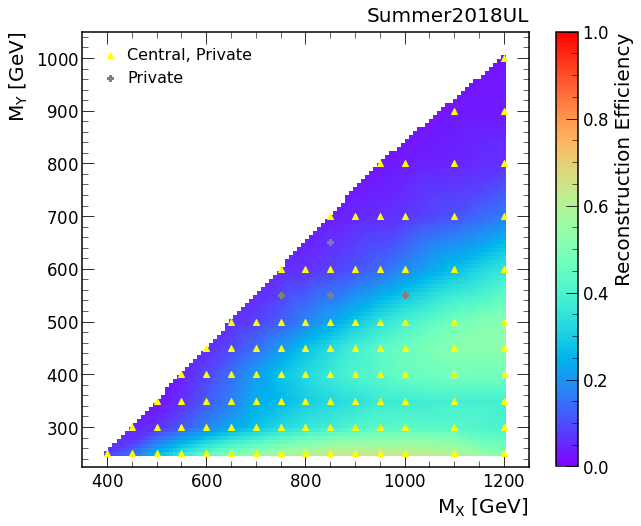

In [21]:
fig, ax = plt.subplots(figsize=(10,8))

im = ax.pcolor(nx, ny, nz, cmap=r_cmap, vmin=0.0, vmax=1.0)
fig.colorbar(im, ax=ax, label='Reconstruction Efficiency')

ax.scatter(MX, MY, color='yellow', zorder=2, marker='^', label='Central, Private')
# ax.scatter(X,Y,color='darkgrey', marker='s', s=70)
ax.scatter(private_MX, private_MY, color='grey', marker='P', label='Private')

ax.set_xlim(350,1250)
ax.set_ylim(225,1050)

ax.set_xlabel(r'$M_X$ [GeV]')
ax.set_ylabel(r'$M_Y$ [GeV]')

ax.legend()
# ax.set_title(title)
ax.set_title(year)

fig.savefig(f'{model_savein}/reco_eff_{year}.pdf')